In [1]:
from sklearn import tree
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Cheat.csv')
df

,Refund,Marital Status,Taxable Income,Cheat
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


#Preprocessing

In [3]:
#Changing caterogical features into float
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Refund'] = encoder.fit_transform(df['Refund'])
df['Marital Status'] = encoder.fit_transform(df['Marital Status'])

In [9]:
df

,Refund,Marital Status,Taxable Income,Cheat
0,1,2,125,No
1,0,1,100,No
2,0,2,70,No
3,1,1,120,No
4,0,0,95,Yes
5,0,1,60,No
6,1,0,220,No
7,0,2,85,Yes
8,0,1,75,No
9,0,2,90,Yes


In [4]:
X = df.iloc[:, :-1]    # Features
y = df.iloc[:, -1]     # Labels

#Making the model

In [5]:
ID3DTclf = tree.DecisionTreeClassifier(criterion = 'entropy')
ID3DTclf = ID3DTclf.fit(X,y)

GCclf = tree.DecisionTreeClassifier(criterion = "gini")
GCclf = GCclf.fit(X, y)

In [6]:
prediction = ID3DTclf.predict([[0,2,95]])
print(prediction)

['Yes']


#Plot Tree

[Text(200.88000000000002, 181.2, 'X[2] <= 97.5\nentropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(133.92000000000002, 108.72, 'X[2] <= 80.0\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

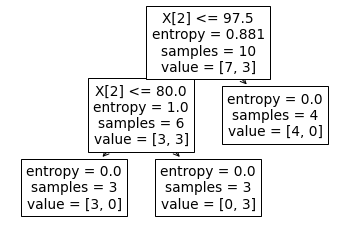

In [7]:
#print tree ID3
tree.plot_tree(ID3DTclf)

[Text(200.88000000000002, 181.2, 'X[2] <= 97.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(133.92000000000002, 108.72, 'X[2] <= 80.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

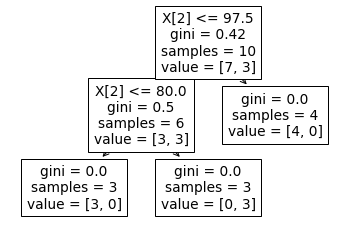

In [8]:
#print tree CART
tree.plot_tree(GCclf)